<a href="https://colab.research.google.com/github/gawankarsanket/dswithchirag_assignments/blob/main/DecisionTree_Assignment_DrugRecords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


#For spliting data into train and test
from sklearn.model_selection import train_test_split


#For the decisiontree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report


#for pre processing
from sklearn import preprocessing

In [74]:
df=pd.read_csv("/content/drug200.csv")

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [76]:
df.shape

(200, 6)

In [77]:
#check how many null values are there
df.isnull().sum()     # means dataset is clean

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [78]:
df.duplicated().sum()

0

In [79]:
df['Drug'].value_counts()

#Dataset is not balanced. lets work on it as it is for now.

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [80]:
#Drug is our output feature or Target coloumn
#Drug has five  categories. convert them into numbers
#drugA - 0   drugB = 1 , drugC = 2, drugX=3 , drugY=4. Alws labels in ascending
#order



label_encoder = preprocessing.LabelEncoder()
df['Drug'] = label_encoder.fit_transform(df['Drug'])

df['Drug'].value_counts()

4    91
3    54
0    23
2    16
1    16
Name: Drug, dtype: int64

In [81]:
#Similary convert Sex, BP Chelesterol column into Numeric
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])


In [82]:
df.head()    #See if drug  column is converted into numeric / encoded form.

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [83]:
df.info()   #to get index number of each col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [84]:
# Now divide them into x and y
# x will have all input column and y will have output column


x=df.iloc[:,0:5]
y=df.iloc[:,5:]

In [85]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [86]:
y.head()

,Drug
0,4
1,2
2,2
3,3
4,4


In [87]:
x.shape,y.shape

((200, 5), (200, 1))

In [88]:
# Splitting the dataset into train and test

# x_train  & y_train
# x_test & y_test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=10)

# NOTE" Sequence of x_train x_test, y_train y_test is fixed.
#test_size 0.3  means test data 30%
# meaning training data 70%

In [89]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((140, 5), (60, 5), (140, 1), (60, 1))

In [90]:
x_test.head()

,Age,Sex,BP,Cholesterol,Na_to_K
59,34,1,0,0,18.703
5,22,0,2,0,8.607
20,57,1,1,1,19.128
198,23,1,2,1,14.020
52,62,1,1,1,27.183


In [91]:
y_test.head()

,Drug
59,4
5,3
20,4
198,3
52,4


In [92]:
x_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
119,61,0,0,0,25.475
110,50,1,0,0,7.490
95,36,1,1,1,11.424
167,57,0,2,0,14.216
193,72,1,1,0,6.769


####Building Decision Tree Classifier using Entropy as a Criterion

In [93]:
model= DecisionTreeClassifier(criterion='entropy',max_depth =4)

model.fit(x_train,y_train)

#depth = tree level till which it will grow and further prunning will happen

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.625, 0.9, 'x[4] <= 14.829\nentropy = 1.909\nsamples = 140\nvalue = [16, 10, 9, 39, 66]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.725\nsamples = 74\nvalue = [16, 10, 9, 39, 0]'),
 Text(0.25, 0.5, 'x[0] <= 53.5\nentropy = 0.961\nsamples = 26\nvalue = [16, 10, 0, 0, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\nentropy = 0.696\nsamples = 48\nvalue = [0, 0, 9, 39, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\nentropy = 0.954\nsamples = 24\nvalue = [0, 0, 9, 15, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 9, 0, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 15\nvalue = [0, 0, 0, 15, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 24\nvalue = [0, 0, 0, 24, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 66\nvalue = [0, 0, 0, 0, 66]')]

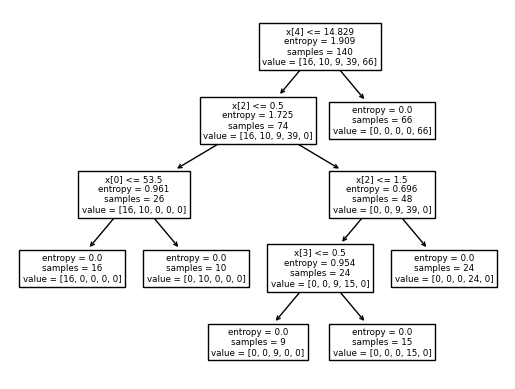

In [94]:
tree.plot_tree(model)

[Text(0.625, 0.9, 'Na_to_K <= 14.829\nentropy = 1.909\nsamples = 140\nvalue = [16, 10, 9, 39, 66]\nclass = drugY'),
 Text(0.5, 0.7, 'BP <= 0.5\nentropy = 1.725\nsamples = 74\nvalue = [16, 10, 9, 39, 0]\nclass = drugX'),
 Text(0.25, 0.5, 'Age <= 53.5\nentropy = 0.961\nsamples = 26\nvalue = [16, 10, 0, 0, 0]\nclass = drugA'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]\nclass = drugA'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0, 0]\nclass = drugB'),
 Text(0.75, 0.5, 'BP <= 1.5\nentropy = 0.696\nsamples = 48\nvalue = [0, 0, 9, 39, 0]\nclass = drugX'),
 Text(0.625, 0.3, 'Cholesterol <= 0.5\nentropy = 0.954\nsamples = 24\nvalue = [0, 0, 9, 15, 0]\nclass = drugX'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 9, 0, 0]\nclass = drugC'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 15\nvalue = [0, 0, 0, 15, 0]\nclass = drugX'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 24\nvalue = [0, 0, 0, 24, 0]\nclass = drugX'),
 Text(0.

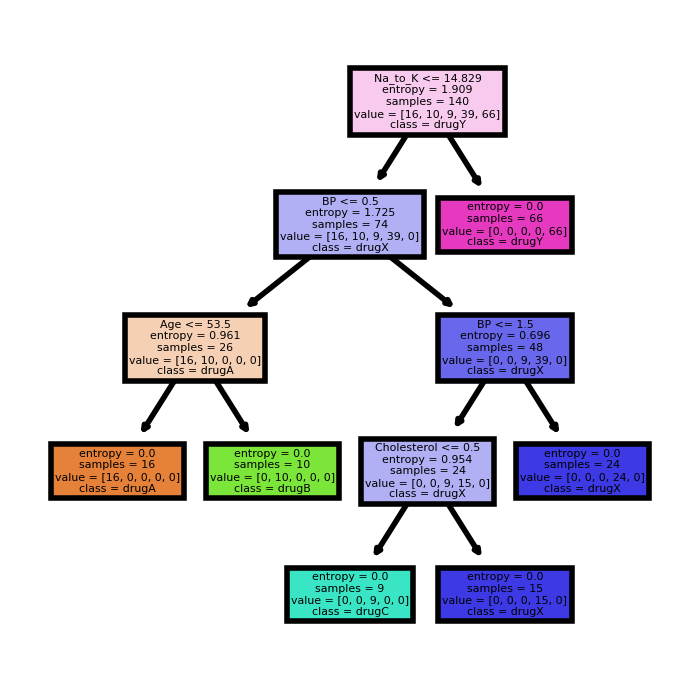

In [95]:
#Just rename it with relavant words



fn = ['Age','Sex','BP','Cholesterol','Na_to_K']
cn = ['drugA','drugB','drugC','drugX','drugY']
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(2,2), dpi=400)
tree.plot_tree(model,feature_names=fn,class_names = cn, filled=True)

## Prediction on the Test data

In [96]:
preds = model.predict(x_test)

In [97]:
pd.Series(preds).value_counts()

4    25
3    15
0     9
2     7
1     4
dtype: int64

In [98]:
preds

array([4, 3, 4, 3, 4, 4, 3, 2, 4, 2, 4, 2, 4, 1, 0, 3, 4, 0, 3, 4, 4, 4,
       0, 4, 2, 4, 1, 2, 2, 4, 3, 3, 0, 4, 3, 4, 3, 0, 0, 0, 4, 2, 4, 0,
       3, 3, 3, 3, 1, 3, 4, 3, 0, 4, 4, 4, 4, 1, 4, 4])

In [99]:
y_test

,Drug
59,4
5,3
20,4
198,3
52,4
19,4
162,3
55,2
69,4
2,2


## Crosstab : way to check 2d table values predicted vs actual

In [100]:
pd.crosstab(y_test['Drug'],preds)

col_0,0,1,2,3,4
Drug,,,,,
0,7,0,0,0,0
1,2,4,0,0,0
2,0,0,7,0,0
3,0,0,0,15,0
4,0,0,0,0,25


##Acccuracy of model

In [101]:
np.mean(preds==y_test['Drug'])

0.9666666666666667

In [102]:
#Add these y_test column and predicted coluns into x_test
x_test['y_testing']=y_test
x_test['Preds']=preds

In [103]:
x_test

,Age,Sex,BP,Cholesterol,Na_to_K,y_testing,Preds
59,34,1,0,0,18.703,4,4
5,22,0,2,0,8.607,3,3
20,57,1,1,1,19.128,4,4
198,23,1,2,1,14.020,3,3
52,62,1,1,1,27.183,4,4
19,32,0,0,1,25.974,4,4
162,43,1,2,1,12.859,3,3
55,26,0,1,0,14.160,2,2
69,18,0,0,1,24.276,4,4
2,47,1,1,0,10.114,2,2
